Get Mean Sqaured (Prediction) Error for lambda-inference for different sample sizes of demonstrated trajectories

In [ ]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import mean_squared_error as MSE

import matplotlib.pyplot as plt

In [2]:
# |Set root for GPUDrive import
import os
import sys
from pathlib import Path

# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive-CoDec':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)
sys.path.append(str(working_dir))

In [3]:
def sqrd_error(true_vals, pred_vals):
    errs = (np.array(true_vals)-np.array(pred_vals))**2
    mean_errs = np.mean(errs)
    # var_errs = np.std(errs, ddof=1)
    var_errs = np.std(errs, ddof=1) / np.sqrt(np.size(errs))
    return mean_errs, var_errs

In [ ]:
data_path = 'examples/CoDec_Research/results/analysis_results/Results_Set1V2_NeurIPS2025/Revision/ServerResults/sampleVariation/Test2/Set1V2_results_1samples.tsv'

temp = pd.read_csv(data_path, sep='\t')

: 

In [16]:
data_path = 'examples/CoDec_Research/results/analysis_results/Results_Set1V2_NeurIPS2025/Revision/ServerResults/sampleVariation/Test2/Set1V2_results_1samples.tsv'
sample_results = {}
for sample_count in list(range(1,10,1))+list(range(10,50,5)):
    # print(f"Results for {sample_count} samples")
    data_path = re.sub(r'[0-9]+samples', f'{sample_count}samples', data_path)
    temp = pd.read_csv(data_path, sep='\t')
    sample_results[sample_count*10] = sqrd_error(temp["lambda_true"], temp["lambda_predicted"])
    # sample_results[sample_count] = MSE(temp["lambda_true"], temp["lambda_predicted"])
    # for grp_indx, grp_data in temp.groupby("parameter"):
    #     print(grp_indx, " : ", MSE(grp_data["lambda_true"], grp_data["lambda_predicted"]))

In [17]:
sample_results

{10: (np.float64(48.1316157864349), np.float64(7.5465670047867635)),
 20: (np.float64(31.192118153617407), np.float64(5.5612868595934115)),
 30: (np.float64(34.261866817073255), np.float64(5.090676308054862)),
 40: (np.float64(24.25380792059639), np.float64(3.705393670259989)),
 50: (np.float64(30.31984757949821), np.float64(4.698088590738838)),
 60: (np.float64(25.277977063253893), np.float64(3.4835936165101855)),
 70: (np.float64(27.774075570182795), np.float64(4.162738510555953)),
 80: (np.float64(29.375242195411506), np.float64(4.304110419511808)),
 90: (np.float64(21.547545819702933), np.float64(3.2838622205093624)),
 100: (np.float64(26.360942345501847), np.float64(4.13695699178629)),
 150: (np.float64(25.598302086713396), np.float64(3.686491618055217)),
 200: (np.float64(22.223867607442703), np.float64(3.363328457200779)),
 250: (np.float64(22.28986376664965), np.float64(3.354862483562318)),
 300: (np.float64(21.540955550573123), np.float64(2.848156498097754)),
 350: (np.float64

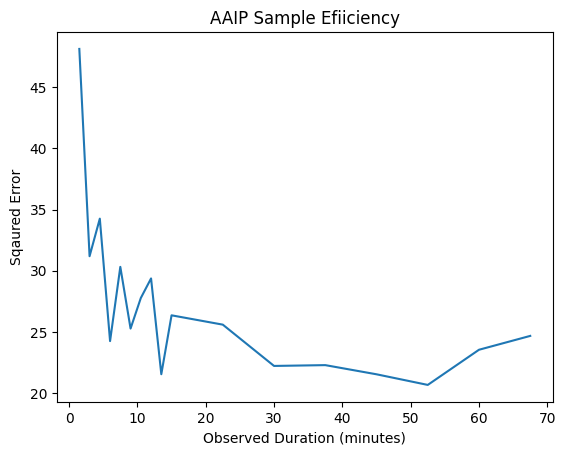

In [30]:
fig, ax = plt.subplots()

ax.plot(np.array(list(sample_results.keys()))*(9/60), 
        [vals[0] for vals in sample_results.values()],
        )
ax.set_xlabel("Observed Duration (minutes)")
ax.set_ylabel("Sqaured Error")
ax.set_title("AAIP Sample Efiiciency")

plt.show()

In [27]:
np.array(list(sample_results.keys()))*(9/60)

array([ 1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 22.5,
       30. , 37.5, 45. , 52.5, 60. , 67.5])

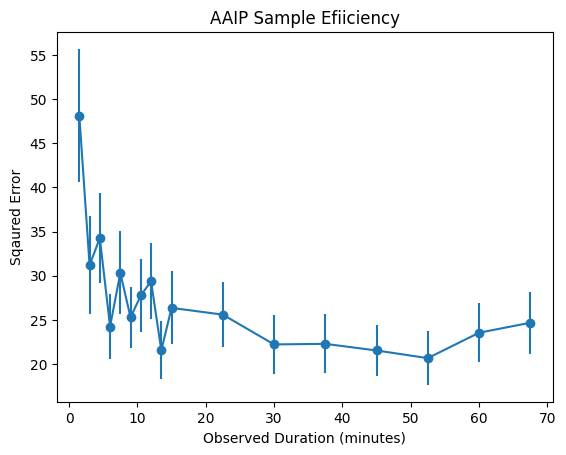

In [29]:
fig, ax = plt.subplots()

ax.errorbar(np.array(list(sample_results.keys()))*(9/60), 
            [vals[0] for vals in sample_results.values()], 
            [vals[1] for vals in sample_results.values()], 
            fmt='-o')
ax.set_xlabel("Observed Duration (minutes)")
ax.set_ylabel("Sqaured Error")
ax.set_title("AAIP Sample Efiiciency")

plt.show()

In [31]:
data_path = 'examples/CoDec_Research/results/analysis_results/Results_Set1V2_NeurIPS2025/Revision/ServerResults/sampleVariation/Test1/Set1V2_results_1samples.tsv'
sample_results = {}
for sample_count in [1,3,5,8,10]:
    # print(f"Results for {sample_count} samples")
    data_path = re.sub(r'[0-9]+samples', f'{sample_count}samples', data_path)
    temp = pd.read_csv(data_path, sep='\t')
    sample_results[sample_count*10] = sqrd_error(temp["lambda_true"], temp["lambda_predicted"])
    # sample_results[sample_count] = MSE(temp["lambda_true"], temp["lambda_predicted"])
    # for grp_indx, grp_data in temp.groupby("parameter"):
    #     print(grp_indx, " : ", MSE(grp_data["lambda_true"], grp_data["lambda_predicted"]))

In [32]:
sample_results

{10: (np.float64(49.63708354794485), np.float64(3.987846352005321)),
 30: (np.float64(31.297427976498014), np.float64(3.2000065099325057)),
 50: (np.float64(25.823783355551754), np.float64(2.3796510639878763)),
 80: (np.float64(22.93873378814721), np.float64(1.5072607934201658)),
 100: (np.float64(23.841099531244435), np.float64(2.1372050671737393))}

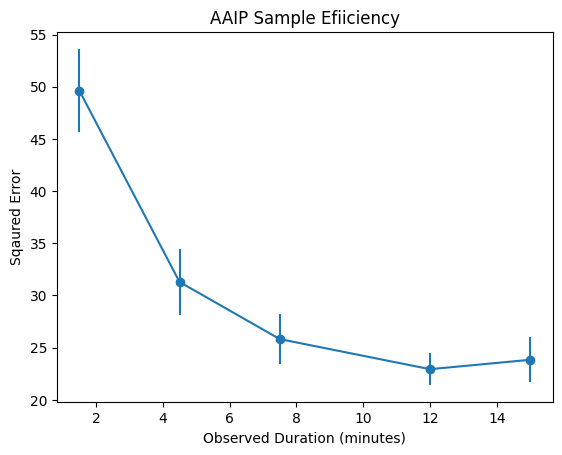

In [33]:
fig, ax = plt.subplots()

ax.errorbar(np.array(list(sample_results.keys()))*(9/60), 
            [vals[0] for vals in sample_results.values()], 
            [vals[1] for vals in sample_results.values()], 
            fmt='-o')
ax.set_xlabel("Observed Duration (minutes)")
ax.set_ylabel("Sqaured Error")
ax.set_title("AAIP Sample Efiiciency")

plt.show()